In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 110 kB 56.7 MB/s 
     |████████████████████████████████| 62 kB 886 kB/s 
     |████████████████████████████████| 112 kB 63.9 MB/s 
     |████████████████████████████████| 4.0 MB 38.0 MB/s 
     |████████████████████████████████| 128 kB 72.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [ ]:
import datetime 
start = datetime.datetime(2018,1,1) 
end = datetime.datetime(2022, 12 ,7)
Shell = yf.Ticker("SHEL") 
#print(Apple.history(start=start, end=end))
df_shell = Shell.history(start=start, end=end)
df_shell

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,53.011669,53.874095,52.940462,53.834538,3470654,0.0,0.0
2018-01-03 00:00:00-05:00,53.739595,54.348837,53.739595,54.269711,3483320,0.0,0.0
2018-01-04 00:00:00-05:00,54.293454,54.649500,54.277626,54.507080,2638891,0.0,0.0
2018-01-05 00:00:00-05:00,54.427962,54.681152,54.259827,54.625767,2562434,0.0,0.0
2018-01-08 00:00:00-05:00,54.435870,54.657410,54.348835,54.641582,2741832,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-30 00:00:00-05:00,58.470001,58.740002,57.856201,58.470001,5377406,0.0,0.0
2022-12-01 00:00:00-05:00,58.689999,58.770000,57.910000,58.049999,4084642,0.0,0.0
2022-12-02 00:00:00-05:00,57.720001,58.209999,57.485001,57.720001,3510813,0.0,0.0


In [ ]:
def plot_predictions(test, predicted,company):
    plt.plot(test, color="red", label="real " + company +  " stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title(company + " stock price prediction")
    plt.xlabel("time")
    plt.ylabel(company + " stock price")
    plt.legend()
    plt.show()

In [ ]:
def return_rmse(test, predicted,company):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error " + company + " is :{}.".format(rmse))

In [ ]:
train_shell = df_shell[:'2021-10'].iloc[:,1:2].values
test_shell = df_shell['2021-10':].iloc[:,1:2].values

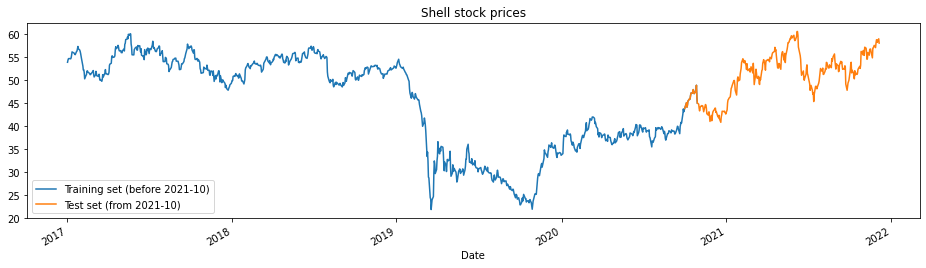

In [ ]:
import matplotlib.pyplot as plt
df_shell["High"][:'2021-10'].plot(figsize=(16,4), legend=True)
df_shell["High"]["2021-10":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2021-10)", "Test set (from 2021-10)"])
plt.title("Shell stock prices")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled_shell = sc.fit_transform(train_shell)

In [ ]:
import math
import numpy as np
x_train_shell = []
y_train_shell = []

for i in range(60,965):
    x_train_shell.append(train_scaled_shell[i-60:i, 0])
    y_train_shell.append(train_scaled_shell[i,0])

x_train_shell, y_train_shell = np.array(x_train_shell), np.array(y_train_shell)

In [ ]:
x_train_shell = np.reshape(x_train_shell, (x_train_shell.shape[0], x_train_shell.shape[1], 1)) #reshaping x_train for efficient modelling
x_train_shell.shape

(905, 60, 1)

In [ ]:
rows = df_shell.values.tolist()  # convert dataframe into a list
rows.reverse()


In [ ]:
df1 = df_shell.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train = []
y_train = []
x_test = []
y_test = []
X = []
Y = []
#X.append(pd.date_range(start=start,end=end))

X = df1.values.tolist()
start2 = datetime.datetime(2018,1,1) 
for row in rows:
    #X.append(pd.date_range(start2=start2,end=start2.timedelta(days=1)))
    #start2 += datetime.timedelta(days=1)
    Y.append(row[3])
    #print("Row 0 ",row)
    #print("Row 3" ,row[3])
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.764,test_size=1 - 0.764, random_state=42) # split training and test data #exactly same split as gru

# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape the values as we have only one input feature
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape the values as we have only one input feature
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
"""
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x_train, y_train)
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')
"""

"\nn_estimators = [5,20,50,100] # number of trees in the random forest\nmax_features = ['auto', 'sqrt'] # number of features in consideration at every split\nmax_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree\nmin_samples_split = [2, 6, 10] # minimum sample number to split a node\nmin_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node\nbootstrap = [True, False] # method used to sample data points\n\nrandom_grid = {'n_estimators': n_estimators,\n\n'max_features': max_features,\n\n'max_depth': max_depth,\n\n'min_samples_split': min_samples_split,\n\n'min_samples_leaf': min_samples_leaf,\n\n'bootstrap': bootstrap}\n\nfrom sklearn.ensemble import RandomForestRegressor\nrf = RandomForestRegressor()\n\nfrom sklearn.model_selection import RandomizedSearchCV\nrf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,\n               n_iter = 100, cv = 5, verbose=2, random_st

In [ ]:
"""
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4,7] # minimum sample number that can be stored in a leaf node
loss = [ "squared_error", "quantile"]

random_grid_gb = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,
'loss': loss
}
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

from sklearn.model_selection import RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator = gb,param_distributions = random_grid_gb,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
gb_random.fit(x_train, y_train)
print ('Random grid: ', random_grid_gb, '\n')
# print the best parameters
print ('Best Parameters: ', gb_random.best_params_, ' \n')
"""

'\nn_estimators = [5,20,50,100] # number of trees in the random forest\nmax_features = [\'auto\', \'sqrt\'] # number of features in consideration at every split\nmax_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree\nmin_samples_split = [2, 6, 10] # minimum sample number to split a node\nmin_samples_leaf = [1, 3, 4,7] # minimum sample number that can be stored in a leaf node\nloss = [ "squared_error", "quantile"]\n\nrandom_grid_gb = {\'n_estimators\': n_estimators,\n\n\'max_features\': max_features,\n\n\'max_depth\': max_depth,\n\n\'min_samples_split\': min_samples_split,\n\n\'min_samples_leaf\': min_samples_leaf,\n\'loss\': loss\n}\nfrom sklearn.ensemble import GradientBoostingRegressor\ngb = GradientBoostingRegressor()\n\nfrom sklearn.model_selection import RandomizedSearchCV\ngb_random = RandomizedSearchCV(estimator = gb,param_distributions = random_grid_gb,\n               n_iter = 100, cv = 5, verbose=2, random_state=

In [ ]:
"""
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid_svr = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svr = GridSearchCV(SVR(), param_grid_svr, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_svr.fit(x_train, y_train)
#print(grid_svr.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svr.best_estimator_)
"""

"\nfrom sklearn.model_selection import GridSearchCV\n  \n# defining parameter range\nparam_grid_svr = {'C': [0.1, 1, 10, 100, 1000], \n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'kernel': ['rbf']} \n  \ngrid_svr = GridSearchCV(SVR(), param_grid_svr, refit = True, verbose = 3)\n  \n# fitting the model for grid search\ngrid_svr.fit(x_train, y_train)\n#print(grid_svr.best_params_)\n  \n# print how our model looks after hyper-parameter tuning\nprint(grid_svr.best_estimator_)\n"

In [ ]:
import time
from sklearn.linear_model import LinearRegression 
start_time_lr = time.time()
clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)
print("Liner Regression--- %s seconds ---" % (time.time() - start_time_lr))
# Support Vector Machine with a Radial Basis Function as kernel 
from sklearn.svm import SVR
start_time_svr = time.time()

clf_svr = SVR(kernel='rbf', C=10, gamma=0.01)
clf_svr.fit(x_train,y_train)
y_pred_svr = clf_svr.predict(x_test)
print("SVR--- %s seconds ---" % (time.time() - start_time_svr))

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
start_time_rf = time.time()

clf_rf = RandomForestRegressor(n_estimators=20,min_samples_split = 6, min_samples_leaf=4,max_features = "auto", max_depth = 10, bootstrap = True)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)
print("Random Forest--- %s seconds ---" % (time.time() - start_time_rf))

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
start_time_gb = time.time()

clf_gb = GradientBoostingRegressor(n_estimators=20,min_samples_split=6,min_samples_leaf = 7,max_features = "auto", max_depth = 30, loss = "squared_error")
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)
print("Gradient Boosting --- %s seconds ---" % (time.time() - start_time_gb))


Liner Regression--- 0.01823282241821289 seconds ---
SVR--- 0.09382414817810059 seconds ---
Random Forest--- 0.04517555236816406 seconds ---
Gradient Boosting --- 0.029166221618652344 seconds ---


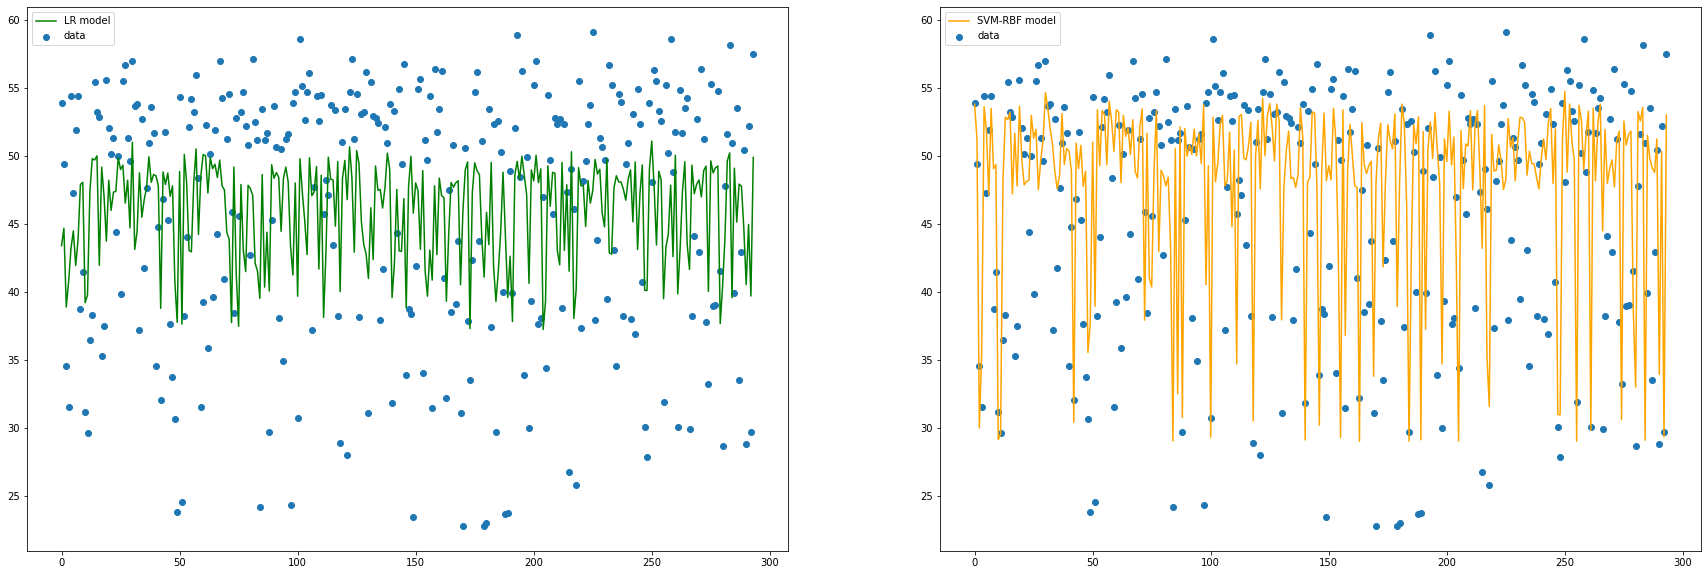

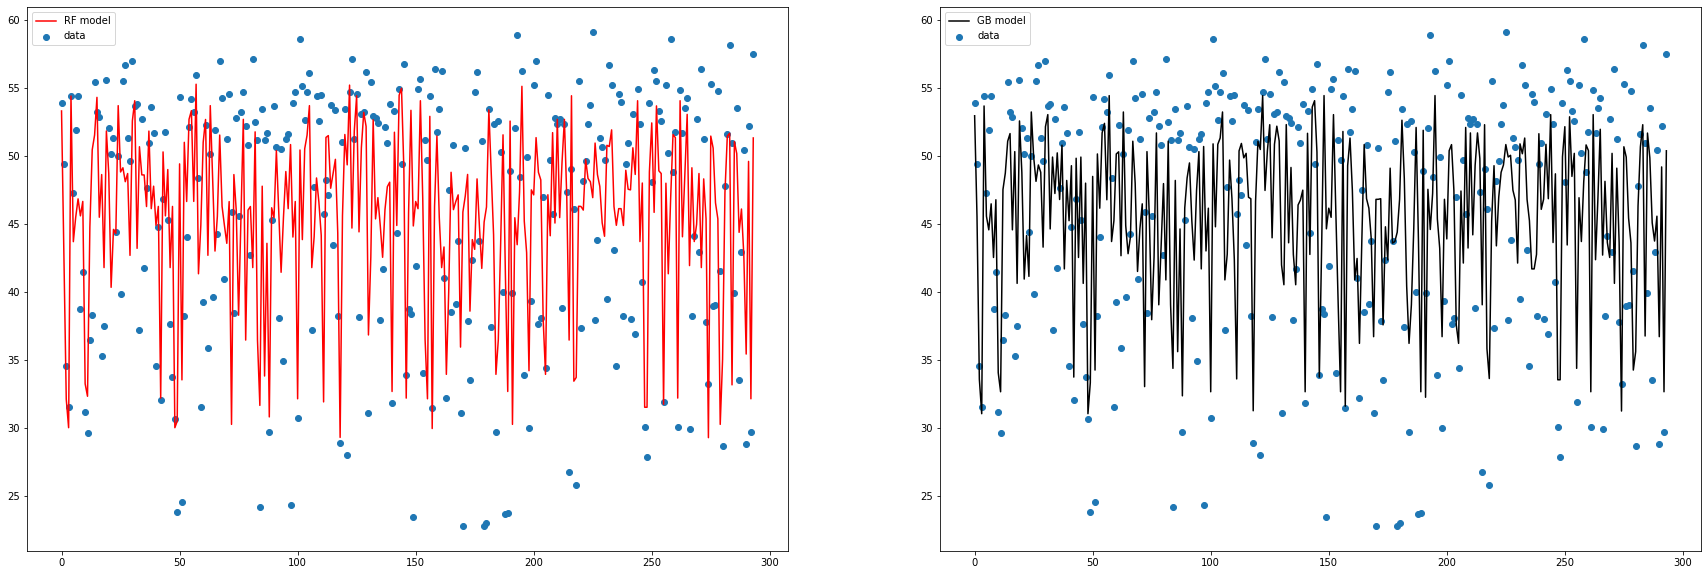

In [ ]:

import matplotlib.pyplot as plt 

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

# Linear Regression
ax1.scatter(range(len(y_test)),y_test,label='data')
ax1.plot(range(len(y_test)),y_pred_lr,color='green',label='LR model')
ax1.legend()

# Support Vector Machine
ax2.scatter(range(len(y_test)),y_test,label='data')
ax2.plot(range(len(y_test)),y_pred_svr,color='orange',label='SVM-RBF model')
ax2.legend()

f1,(ax3,ax4) = plt.subplots(1,2,figsize=(30,10))

# Random Forest Regressor
ax3.scatter(range(len(y_test)),y_test,label='data')
ax3.plot(range(len(y_test)),y_pred_rf,color='red',label='RF model')
ax3.legend()

# Gradient Boosting Regressor
ax4.scatter(range(len(y_test)),y_test,label='data')
ax4.plot(range(len(y_test)),y_pred_gb,color='black',label='GB model')
ax4.legend()

In [ ]:
import sklearn.metrics as metrics
print("Metrics of Linear Regression")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_lr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_lr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)), 4))
errors = abs(y_pred_lr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Linear Regression
Mean Absolute Error: 7.8965
Mean Squared Error: 79.1955
Root Mean Squared Error: 8.8992
Accuracy: 80.5 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_lr)
print("R^2 Score for Linear Regression: ", coefficient_of_dermination)

R^2 Score for Linear Regression:  0.09477516265405583


In [ ]:
import sklearn.metrics as metrics
print("Metrics of SVR")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_svr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_svr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)), 4))
errors = abs(y_pred_svr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of SVR
Mean Absolute Error: 6.0814
Mean Squared Error: 67.2688
Root Mean Squared Error: 8.2018
Accuracy: 84.3 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(x_test, y_pred_svr)
print("R^2 Score for SVR: ", coefficient_of_dermination)

R^2 Score for SVR:  0.4675923415071789


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Random Forest")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_rf), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_rf), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)), 4))
errors = abs(y_pred_rf - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Random Forest
Mean Absolute Error: 6.4215
Mean Squared Error: 64.4262
Root Mean Squared Error: 8.0266
Accuracy: 84.44 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(x_test, y_pred_rf)
print("R^2 Score for Random Forest: ", coefficient_of_dermination)

R^2 Score for Random Forest:  0.41837592808154656


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Gradient Boosting Regressor")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_gb), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_gb), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)), 4))
errors = abs(y_pred_gb - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Gradient Boosting Regressor
Mean Absolute Error: 6.5656
Mean Squared Error: 65.9608
Root Mean Squared Error: 8.1216
Accuracy: 84.0 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(x_test, y_pred_gb)
print("R^2 Score for Gradient Boosting Regressor: ", coefficient_of_dermination)

R^2 Score for Gradient Boosting Regressor:  0.37732261678785495


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD


In [ ]:
# LSTM architecture

regressor_shell = Sequential()

# add first layer with dropout

regressor_shell.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_shell.shape[1],1)))
regressor_shell.add(Dropout(0.2))

# add second layer

regressor_shell.add(LSTM(units=50, return_sequences=True))
regressor_shell.add(Dropout(0.2))

# add third layer

regressor_shell.add(LSTM(units=50, return_sequences=True))
regressor_shell.add(Dropout(0.2))

# add fourth layer

regressor_shell.add(LSTM(units=50))
regressor_shell.add(Dropout(0.2))

# the output layer

regressor_shell.add(Dense(units=1))

In [ ]:
# compiling the LSTM RNN network
start_time_lstm = time.time()

regressor_shell.compile(optimizer='adam', loss='mean_squared_error')
# fit to the training set

regressor_shell.fit(x_train_shell, y_train_shell, epochs=10, batch_size=32)
print("LSTM --- %s seconds ---" % (time.time() - start_time_lstm))


Epoch 1/10
29/29 [==============================] - 22s 156ms/step - loss: 0.0925
Epoch 2/10
29/29 [==============================] - 3s 108ms/step - loss: 0.0145
Epoch 3/10
29/29 [==============================] - 3s 113ms/step - loss: 0.0126
Epoch 4/10
29/29 [==============================] - 3s 111ms/step - loss: 0.0099
Epoch 5/10
29/29 [==============================] - 3s 106ms/step - loss: 0.0102
Epoch 6/10
29/29 [==============================] - 3s 110ms/step - loss: 0.0098
Epoch 7/10
29/29 [==============================] - 3s 107ms/step - loss: 0.0090
Epoch 8/10
29/29 [==============================] - 3s 108ms/step - loss: 0.0097
Epoch 9/10
29/29 [==============================] - 3s 112ms/step - loss: 0.0087
Epoch 10/10
29/29 [==============================] - 3s 112ms/step - loss: 0.0085
LSTM --- 51.16790199279785 seconds ---


In [ ]:
dataset_total_shell = pd.concat((df_shell['High'][:'2021-10'], df_shell['High']['2021-10':]), axis=0)
print(dataset_total_shell.shape)

inputs_shell = dataset_total_shell[len(dataset_total_shell)-len(test_shell)-60 : ].values
print(inputs_shell.shape)
inputs_shell = inputs_shell.reshape(-1,1)
print(inputs_shell.shape)
inputs_shell = sc.transform(inputs_shell)
print(inputs_shell.shape)

(1263,)
(358,)
(358, 1)
(358, 1)


In [ ]:
# preparing x_test
x_test_shell = []
for i in range(60,358):
    x_test_shell.append(inputs_shell[i-60:i, 0])
    
x_test_shell = np.array(x_test_shell)
x_test_shell = np.reshape(x_test_shell, (x_test_shell.shape[0], x_test_shell.shape[1], 1))

In [ ]:
predicted_shell = regressor_shell.predict(x_test_shell)
predicted_shell = sc.inverse_transform(predicted_shell)

10/10 [==============================] - 2s 27ms/step


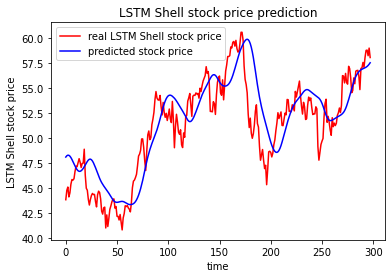

In [ ]:
plot_predictions(test_shell, predicted_shell, "LSTM Shell")

In [ ]:
return_rmse(test_shell, predicted_shell,"Shell")

the root mean squared error Shell is :2.609345389175932.


In [ ]:
x_test_shell.shape

(298, 60, 1)

In [ ]:
x_test_shell = np.reshape(x_test_shell, (x_test_shell.shape[0], x_test_shell.shape[1])) #reshaping x_train for efficient modelling


In [ ]:
print(x_test_shell.shape)
print(predicted_shell.shape)
print(test_shell.shape)

(298, 60)
(298, 1)
(298, 1)


In [ ]:
x_test_shell

array([[0.4643009 , 0.45594621, 0.46255498, ..., 0.70692912, 0.6390839 ,
        0.60500504],
       [0.45594621, 0.46255498, 0.47103437, ..., 0.6390839 , 0.60500504,
        0.57495751],
       [0.46255498, 0.47103437, 0.46725589, ..., 0.60500504, 0.57495751,
        0.59932845],
       ...,
       [0.78655837, 0.82160295, 0.84301901, ..., 0.94648677, 0.96508312,
        0.96586884],
       [0.82160295, 0.84301901, 0.83393348, ..., 0.96508312, 0.96586884,
        0.95120133],
       [0.84301901, 0.83393348, 0.84081259, ..., 0.96586884, 0.95120133,
        0.97110725]])

In [ ]:
import sklearn.metrics as metrics
print("Metrics of LSTM")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(test_shell, predicted_shell), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test_shell, predicted_shell), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test_shell, predicted_shell)), 4))
errors = abs(predicted_shell - test_shell)
mape = 100 * (errors / test_shell)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of LSTM
Mean Absolute Error: 2.0567
Mean Squared Error: 6.8087
Root Mean Squared Error: 2.6093
Accuracy: 95.9 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_shell, predicted_shell)
print("R^2 Score for LSTM: ", coefficient_of_dermination)

R^2 Score for LSTM:  0.6996646785419385


In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_shell.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_shell.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_shell.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [ ]:
start_time_gru = time.time()

regressorGRU.compile(optimizer="adam", loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train_shell, y_train_shell, epochs=10, batch_size=32)
print("GRU --- %s seconds ---" % (time.time() - start_time_gru))


Epoch 1/10
29/29 [==============================] - 11s 111ms/step - loss: 0.0565
Epoch 2/10
29/29 [==============================] - 3s 114ms/step - loss: 0.0116
Epoch 3/10
29/29 [==============================] - 3s 117ms/step - loss: 0.0077
Epoch 4/10
29/29 [==============================] - 3s 112ms/step - loss: 0.0079
Epoch 5/10
29/29 [==============================] - 3s 118ms/step - loss: 0.0064
Epoch 6/10
29/29 [==============================] - 3s 120ms/step - loss: 0.0067
Epoch 7/10
29/29 [==============================] - 3s 118ms/step - loss: 0.0066
Epoch 8/10
29/29 [==============================] - 3s 120ms/step - loss: 0.0061
Epoch 9/10
29/29 [==============================] - 3s 114ms/step - loss: 0.0059
Epoch 10/10
29/29 [==============================] - 3s 117ms/step - loss: 0.0058
GRU --- 41.20807218551636 seconds ---


10/10 [==============================] - 2s 27ms/step


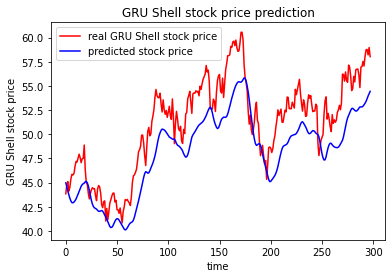

In [ ]:
predicted_with_gru_shell = regressorGRU.predict(x_test_shell)
predicted_with_gru_shell = sc.inverse_transform(predicted_with_gru_shell)

plot_predictions(test_shell, predicted_with_gru_shell, "GRU Shell")

In [ ]:
return_rmse(test_shell, predicted_with_gru_shell,"GRU Shell")

the root mean squared error GRU Shell is :3.4210621442323927.


In [ ]:
import sklearn.metrics as metrics
print("Metrics of GRU")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(test_shell, predicted_with_gru_shell), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test_shell, predicted_with_gru_shell), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test_shell, predicted_with_gru_shell)), 4))
errors = abs(predicted_with_gru_shell - test_shell)
mape = 100 * (errors / predicted_with_gru_shell)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of GRU
Mean Absolute Error: 3.0346
Mean Squared Error: 11.7037
Root Mean Squared Error: 3.4211
Accuracy: 93.73 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_shell, predicted_with_gru_shell)
print("R^2 Score for GRU: ", coefficient_of_dermination)

R^2 Score for GRU:  0.4837438954106421
